## Data Wrangling: Clean, Transform, Merge, Reshape

In [5]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [6]:
%matplotlib inline

## Combining and merging data sets

### Database-style DataFrame merges

In [7]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [8]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [9]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [10]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [11]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [12]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [13]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})

In [14]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [15]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [16]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [17]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [18]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [19]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [20]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on index

In [21]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [22]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [23]:
right1

,group_val
a,3.5
b,7.0


In [24]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [25]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [26]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [27]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [28]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [29]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [30]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [ ]:
left2

In [ ]:
right2

In [ ]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

In [ ]:
left2.join(right2, how='outer')

In [ ]:
left1.join(right1, on='key')

In [ ]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])
another

In [ ]:
right2

In [ ]:
left2

In [ ]:
left2.join([right2, another])

In [ ]:
left2.join([right2, another], how='outer')

### Concatenating along an axis

In [31]:
arr = np.arange(12).reshape((3, 4))

In [32]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [34]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [35]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [36]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [37]:
s4 = pd.concat([s1 * 5, s3])

In [38]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [ ]:
pd.concat([s1, s4], axis=1, join='inner')

In [ ]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [ ]:
result

In [ ]:
# Much more on the unstack function later
result.unstack()

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

In [ ]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

In [ ]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

In [ ]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], ignore_index=True)

### Combining data with overlap

In [39]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [40]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [41]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [42]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [ ]:
b[:-2].combine_first(a[2:])

In [ ]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})


In [ ]:
df1

In [ ]:
df2

In [ ]:
df1.combine_first(df2)

## Reshaping and pivoting

### Reshaping with hierarchical indexing

In [43]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [44]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [45]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [46]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [47]:
result.unstack(1)

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [48]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

In [ ]:
data2.unstack().stack()

In [ ]:
data2.unstack().stack(dropna=False)

In [ ]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

In [ ]:
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### Pivoting "long" to "wide" format

In [49]:
data = pd.read_csv('ch07/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [50]:
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [51]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

In [ ]:
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

## Data transformation

### Removing duplicates

In [ ]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

In [ ]:
data.duplicated()

In [ ]:
data.drop_duplicates()

In [ ]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep = 'last')

### Transforming data using a function or mapping

In [ ]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

In [ ]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [ ]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

In [ ]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

### Replacing values

In [ ]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

In [ ]:
data.replace(-999, np.nan)

In [ ]:
data.replace([-999, -1000], np.nan)

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
data.replace({-999: np.nan, -1000: 0})

### Renaming axis indexes

In [ ]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [ ]:
data.index.map(str.upper)

In [ ]:
data.index = data.index.map(str.upper)
data

In [ ]:
data.rename(index=str.title, columns=str.upper)

In [ ]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

In [ ]:
# Always returns a reference to a DataFrame
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

### Discretization and binning

In [52]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [53]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [54]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [55]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [56]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [57]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [58]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [59]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.73, 0.96], (0.25, 0.49], (0.0074, 0.25], (0.0074, 0.25], (0.49, 0.73], ..., (0.49, 0.73], (0.73, 0.96], (0.73, 0.96], (0.73, 0.96], (0.49, 0.73]]
Length: 20
Categories (4, interval[float64]): [(0.0074, 0.25] < (0.25, 0.49] < (0.49, 0.73] < (0.73, 0.96]]

In [60]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(0.626, 3.928], (0.626, 3.928], (-2.95, -0.691], (-0.691, -0.0171], (0.626, 3.928], ..., (-0.0171, 0.626], (0.626, 3.928], (-0.691, -0.0171], (-0.691, -0.0171], (-0.0171, 0.626]]
Length: 1000
Categories (4, interval[float64]): [(-2.95, -0.691] < (-0.691, -0.0171] < (-0.0171, 0.626] < (0.626, 3.928]]

In [61]:
pd.value_counts(cats)

(0.626, 3.928]       250
(-0.0171, 0.626]     250
(-0.691, -0.0171]    250
(-2.95, -0.691]      250
dtype: int64

In [62]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(1.297, 3.928], (-0.0171, 1.297], (-2.95, -1.191], (-1.191, -0.0171], (1.297, 3.928], ..., (-0.0171, 1.297], (-0.0171, 1.297], (-1.191, -0.0171], (-1.191, -0.0171], (-0.0171, 1.297]]
Length: 1000
Categories (4, interval[float64]): [(-2.95, -1.191] < (-1.191, -0.0171] < (-0.0171, 1.297] < (1.297, 3.928]]

### Detecting and filtering outliers

In [ ]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

In [ ]:
col = data[3]
col[np.abs(col) > 3]

In [ ]:
data[(np.abs(data) > 3).any(1)]

In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

### Permutation and random sampling

In [ ]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

In [ ]:
df

In [ ]:
df.take(sampler)

In [ ]:
df.take(np.random.permutation(len(df))[:3])

In [ ]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)

In [ ]:
sampler

In [ ]:
draws = bag.take(sampler)
draws

### Computing indicator / dummy variables

In [63]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [64]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [ ]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

In [ ]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [ ]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

In [ ]:
for i, gen in enumerate(movies.genres):
    dummies.loc[i, gen.split('|')] = 1

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

In [ ]:
np.random.seed(12345)

In [ ]:
values = np.random.rand(10)
values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

## String manipulation

### String object methods

In [ ]:
val = 'a,b,  guido'
val.split(',')

In [ ]:
pieces = [x.strip() for x in val.split(',')]
pieces

In [ ]:
first, second, third = pieces
first + '::' + second + '::' + third

In [ ]:
'::'.join(pieces)

In [ ]:
'guido' in val

In [ ]:
val.index(',')

In [ ]:
val.find(':')

In [ ]:
val.index(':')

In [ ]:
val.count(',')

In [ ]:
val.replace(',', '::')

In [ ]:
val.replace(',', '')

### Regular expressions

In [65]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [66]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [67]:
regex.findall(text)

['    ', '\t ', '  \t']

In [68]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [69]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [70]:
m = regex.search(text)
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [71]:
text[m.start():m.end()]

'dave@google.com'

In [72]:
print(regex.match(text))

None


In [73]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [74]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [75]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [76]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [77]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [78]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [79]:
m = regex.match('wesm@bright.net')
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

### Vectorized string functions in pandas

In [80]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [81]:
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [82]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [83]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [84]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [85]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [88]:
matches.str.get(1)

AttributeError: 'DataFrame' object has no attribute 'str'

In [87]:
matches = data.str.extract(pattern, flags=re.IGNORECASE, expand = False)
matches

,0,1,2
Dave,dave,google,com
Rob,rob,gmail,com
Steve,steve,gmail,com
Wes,NaN,NaN,NaN


In [89]:
matches[0]

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
Name: 0, dtype: object

In [90]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

## Example: USDA Food Database

In [91]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [92]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [93]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [94]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [95]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [96]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [97]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [98]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [99]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [100]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [101]:
nutrients.duplicated().sum()

14179

In [102]:
nutrients = nutrients.drop_duplicates()

In [103]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [104]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [105]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [106]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [107]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [108]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

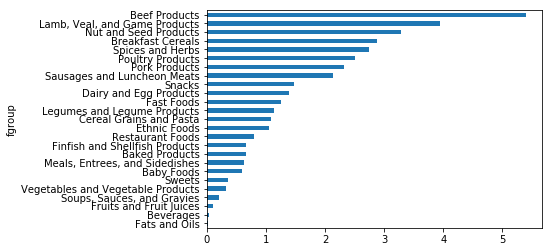

In [109]:
result['Zinc, Zn'].sort_values().plot(kind = 'barh')

In [110]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [111]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 